## NES-LTER: Comparison between CTD and sampled chlorophyll concentration estimates

This notebook combines chlorophyll concentration estimates derived from a CTD-mounted fluorometer with corresponding estaimates derived from lab processing of samples. This enables confirming that the estimates match, which aids in the decision of when to take samples.

In [1]:
import pandas as pd

BASE_URL = 'https://raw.githubusercontent.com/WHOIGit/nes-lter-examples/master/data/'

chl = pd.read_csv(BASE_URL + 'neslter_sosik_chl.csv')
btl = pd.read_csv(BASE_URL + 'en608_btl.csv')

Samples are replicated, so the chlorophyll concentration needs to be averaged across those replicates. This uses a function called [`average_replicates`](https://github.com/WHOIGit/nes-lter-ims/blob/master/neslter/analysis/chl.py)

In [2]:
from neslter.analysis.chl import average_replicates

chl_avg = average_replicates(chl)

# now only include WSW
chl_avg = chl_avg[chl_avg['filter_mesh_size'] == '>0']

Now the two datasets need to be collated so that they align on cruise, cast, and niskin bottle number.

In [3]:
# merge sample and CTD data per-niskin
merged = btl.merge(chl_avg, on=['cruise','cast','niskin'])

# display a few rows to make sure we're doing it right
merged[['cruise','cast','niskin','chl','fleco_afl','par']].head()

,cruise,cast,niskin,chl,fleco_afl,par
0,EN608,1,2,5.737033,3.9609,4.395900e+00
1,EN608,1,5,5.174035,2.9635,2.574600e+01
2,EN608,1,9,5.387947,2.5430,1.283600e+02
3,EN608,1,19,5.344230,1.7145,6.749100e+02
4,EN608,19,1,0.014856,0.0020,1.000000e-12


The column containing CTD-derived data is called `fleco_afl` and the one containing the sample-derived data is called `chl`.

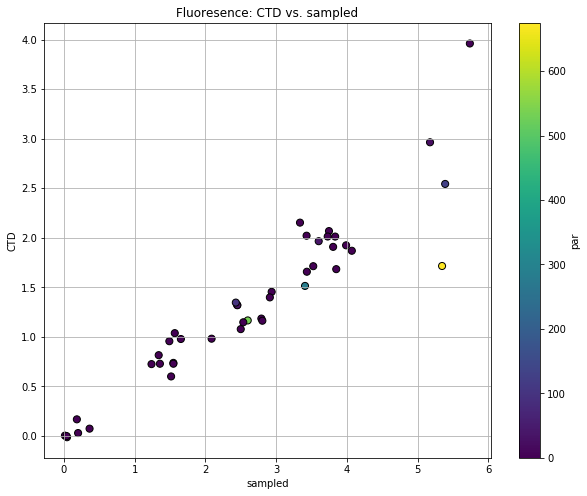

In [4]:
%matplotlib inline

# now plot CTD against sampled data
ax = merged.plot.scatter(
    x='chl',
    y='fleco_afl',
    c='par',
    s=50,
    cmap='viridis',
    edgecolor='black',
    title='Fluoresence: CTD vs. sampled',
    grid=True,
    figsize=(10,8),
    sharex=False
)
ax.set_xlabel('sampled')
ax.set_ylabel('CTD')
None